<a href="https://colab.research.google.com/github/dearmypoem/itbfinal/blob/main/ITB_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_002_2%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IT와비즈니스혁신(002) 2조 기말 미니 프로젝트**

**<연세우유 크림빵의 홈딜리버리 서비스 구축을 위한 데이터마이닝 프로젝트>**



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  
import matplotlib.font_manager as fm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 네이버 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

#Data1: 식품소비행태조사
얻고자 하는 인사이트 :
* 어느 성별과 나이대가 빵류를 많이 소비하는가?
* 어느 시간대에 많이 소비하는가?

데이터 전처리 :
> 이미 범주형으로 전처리가 되어 있었던 자료로, 식별을 위한 응답자 id와 성별, 나이 칼럼, 5개의 응답 칼럼만 남기고 삭제함. 정량적 질문지의 응답을 엑셀로 처리한 원시자료이기에 칼럼명이 "A1_1_4"와 같이 질문 위계를 표현하는 숫자로 되어 있어, 각각 알아볼 수 있는 단어로 변경함.




In [4]:
## 2021 식품소비행태조사 통계원시자료
consume_behavior = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/consume_behavior.csv", encoding = "UTF8")

In [5]:
display(consume_behavior.head(10))
print(consume_behavior.info())
print(consume_behavior.describe())

## 일주일 간 아침 식사로 섭취한 횟수 : breakfast
## 일주일 간 점심 식사로 섭취한 횟수 : lunch
## 일주일 간 저녁 식사로 섭취한 횟수 : dinner
## 전년 대비 카페&제과제빵 전문점 지출 금액 증감 : expend
## 전년 대비 카페&제과제빵 전문점 이용 빈도 증감 : frequency

,id,gender,age,breakfast,lunch,dinner,expend,frequency
0,1A00110101,2,41,0,0,0,4.0,NaN
1,1A00110102,1,43,0,0,0,NaN,NaN
2,1A00310101,2,56,0,0,0,3.0,NaN
3,1A00310301,2,44,0,0,0,4.0,NaN
4,1A00310401,2,40,0,0,0,4.0,4.0
5,1A00310402,1,41,0,0,0,4.0,4.0
6,1A00310501,2,38,1,0,0,4.0,4.0
7,1A00310502,1,41,1,0,0,3.0,4.0
8,1A00410101,2,40,0,0,0,3.0,3.0
9,1A00410102,1,44,0,0,0,3.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6355 non-null   object 
 1   gender     6355 non-null   int64  
 2   age        6355 non-null   int64  
 3   breakfast  6355 non-null   int64  
 4   lunch      6355 non-null   int64  
 5   dinner     6355 non-null   int64  
 6   expend     5140 non-null   float64
 7   frequency  4751 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 397.3+ KB
None
            gender          age    breakfast        lunch       dinner  \
count  6355.000000  6355.000000  6355.000000  6355.000000  6355.000000   
mean      1.552164    49.397168     0.029583     0.043116     0.012903   
std       0.497311    14.221922     0.242105     0.299035     0.143554   
min       1.000000    19.000000     0.000000     0.000000     0.000000   
25%       1.000000    40.000000     0.000000     0.0000

In [6]:
## 결측치 체크
consume_behavior.isnull().sum()

id              0
gender          0
age             0
breakfast       0
lunch           0
dinner          0
expend       1215
frequency    1604
dtype: int64

In [7]:
## 최빈값으로 지출 증감, 이용 빈도 결측치 보간

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "most_frequent")
df_impute = pd.DataFrame(imputer.fit_transform(consume_behavior))
print("최빈값으로 보간:", df_impute.shape)  
print(df_impute.isna().sum()) 

최빈값으로 보간: (6355, 8)
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


##  어느 성별과 나이대가 지출/빈도의 증가가 높았나?


> 원시자료의 설문지 확인 결과, 해당 변수의 경우 5점 척도(매우 감소했다 ~ 매우 증가했다)로 구성되어 1~5 사이에서 3을 기준으로 3보다 높을 시 증가, 3보다 낮을 시 감소를 나타냄


*   성별의 경우, 두 성별 모두에서 지출 금액이 감소하였으나 여성의 지출 금액이 적게 감소한 것으로 확인됨. 또한 이용 빈도의 경우 두 성별 모두 비슷한 수치로 증가함.
*   이에 따라 여성의 경우로 한정하여 연령별 지출/빈도의 증가를 확인함. 20대의 경우 지출 금액 감소가 다른 집단에 비해 다소 적었으며, 이용 빈도에서는 대부분 비슷한 수준을 보임.




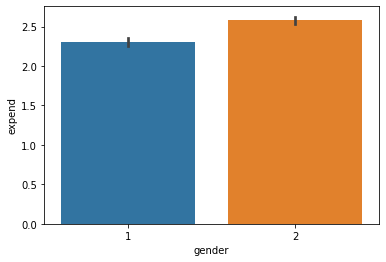

In [8]:
## 성별에 따른 지출 금액 증감 척도
sns.barplot(data=consume_behavior, x="gender", y="expend")

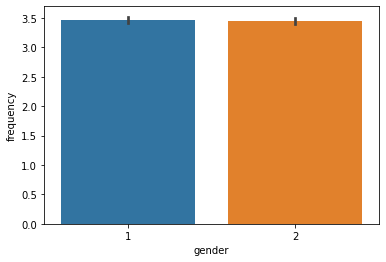

In [9]:
## 성별에 따른 이용 빈도 증감 척도
sns.barplot(data=consume_behavior, x="gender", y="frequency")

In [10]:
male = df_impute[df_impute[1]==1].index
consume_fbehavior=df_impute.drop(male)
consume_fbehavior #기존의 데이터 테이블에서 여성들의 값들만 골라 여성 소비 행태 조사 데이터로 필터링

,0,1,2,3,4,5,6,7
0,1A00110101,2,41,0,0,0,4.0,3.0
2,1A00310101,2,56,0,0,0,3.0,3.0
3,1A00310301,2,44,0,0,0,4.0,3.0
4,1A00310401,2,40,0,0,0,4.0,4.0
6,1A00310501,2,38,1,0,0,4.0,4.0
...,...,...,...,...,...,...,...,...
6347,7P21510101,2,44,0,0,0,0.0,3.0
6349,7P21510201,2,51,0,1,1,0.0,3.0
6350,7P23190201,2,53,0,0,0,3.0,3.0
6352,7P23190203,2,22,0,0,0,3.0,3.0


In [11]:
# 나이대들을 묶어 시각화 용이하게 조정
consume_fbehavior.loc[consume_fbehavior[2]<30,'age'] = '20s'
consume_fbehavior.loc[(consume_fbehavior[2]<40)&(consume_fbehavior[2]>=30),'age'] = '30s'
consume_fbehavior.loc[(consume_fbehavior[2]<50)&(consume_fbehavior[2]>=40),'age'] = '40s'
consume_fbehavior.loc[(consume_fbehavior[2]<60)&(consume_fbehavior[2]>=50),'age'] = '50s'
consume_fbehavior.loc[(consume_fbehavior[2]<70)&(consume_fbehavior[2]>=60),'age'] = '60s'
consume_fbehavior.loc[(consume_fbehavior[2]<80)&(consume_fbehavior[2]>=70),'age'] = '70s'
consume_fbehavior

,0,1,2,3,4,5,6,7,age
0,1A00110101,2,41,0,0,0,4.0,3.0,40s
2,1A00310101,2,56,0,0,0,3.0,3.0,50s
3,1A00310301,2,44,0,0,0,4.0,3.0,40s
4,1A00310401,2,40,0,0,0,4.0,4.0,40s
6,1A00310501,2,38,1,0,0,4.0,4.0,30s
...,...,...,...,...,...,...,...,...,...
6347,7P21510101,2,44,0,0,0,0.0,3.0,40s
6349,7P21510201,2,51,0,1,1,0.0,3.0,50s
6350,7P23190201,2,53,0,0,0,3.0,3.0,50s
6352,7P23190203,2,22,0,0,0,3.0,3.0,20s


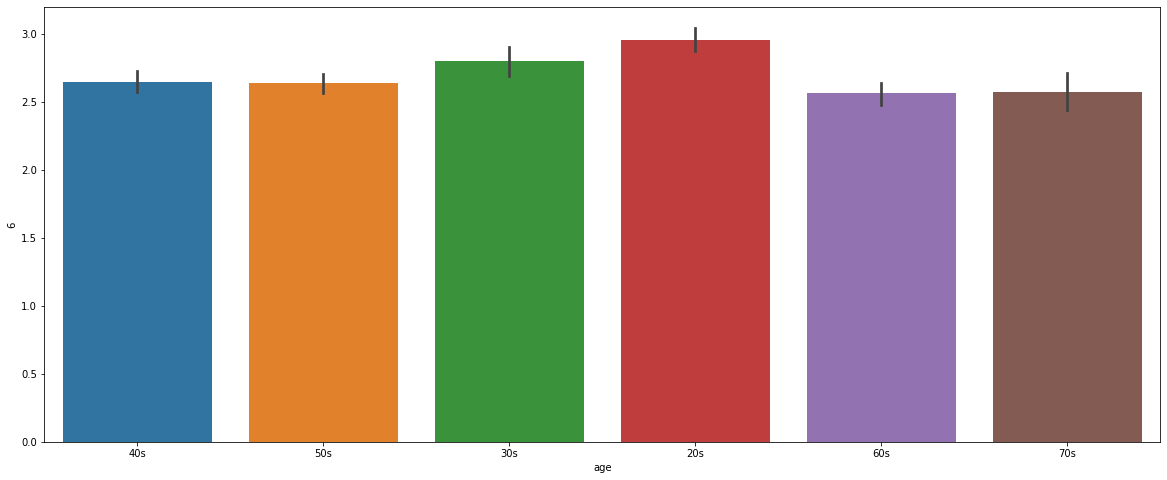

In [12]:
## 연령에 따른 지출 금액 증감 척도
plt.figure(figsize=(20, 8))
sns.barplot(data=consume_fbehavior, x='age', y=6) #2 : 나이, 6 : 지출금액

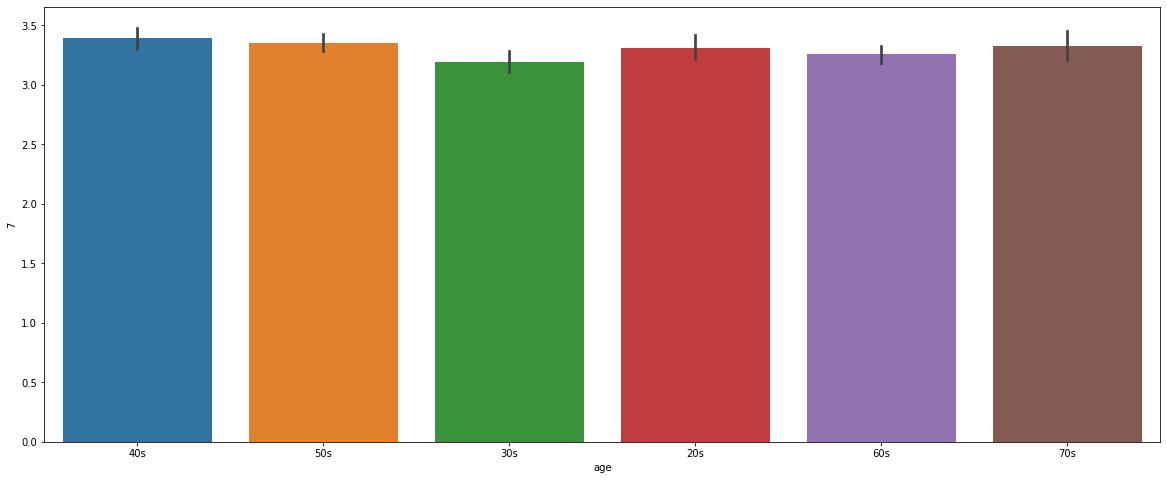

In [13]:
## 연령에 따른 이용 빈도 증감 척도
plt.figure(figsize=(20, 8))
sns.barplot(data=consume_fbehavior, x='age', y=7) # 7 : 이용빈도 증감

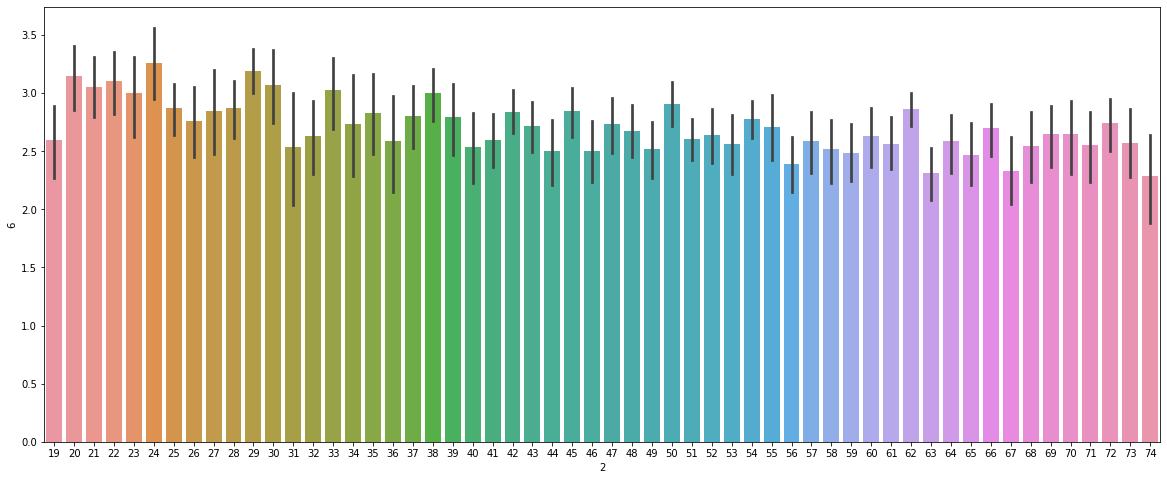

In [14]:
# 세부적인 나이에 따른 지출 금액 증감 척도
plt.figure(figsize=(20, 8))
sns.barplot(data=consume_fbehavior, x=2, y=6) #2 : 나이, 6 : 지출금액

##  어느 성별과 나이대에서 빵류 식사 비중이 높은가?


> 아침, 점심, 저녁 식사로 빵류를 먹는 사람들이 어느 집단에 많은지 확인

*   여성, 20대가 가장 많고, 다음으로 30대에서 많이 나타남








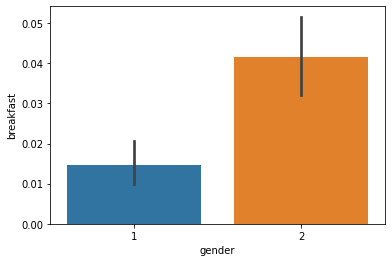

In [15]:
## 성별-아침식사, 1=남성, 2=여성
sns.barplot(data=consume_behavior, x='gender', y='breakfast')

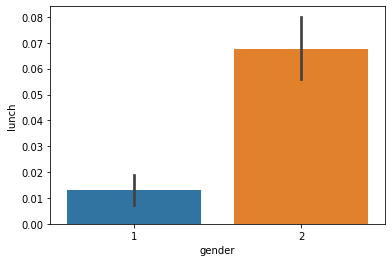

In [16]:
## 성별-점심식사, 1=남성, 2=여성
sns.barplot(data=consume_behavior, x='gender', y='lunch')

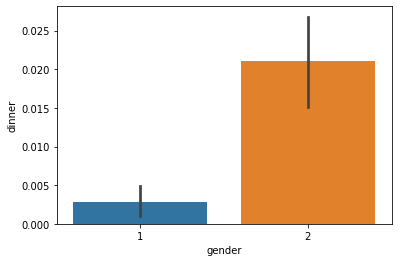

In [17]:
## 성별-저녁식사, 1=남성, 2=여성
sns.barplot(data=consume_behavior, x='gender', y='dinner')

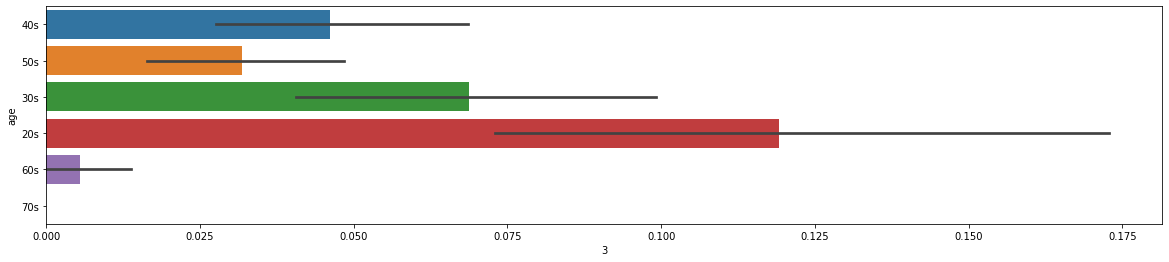

In [18]:
## 나이-아침식사, 앞선 성별 비중에 따라 여성에 한정하여 집중
plt.figure(figsize=(20, 4))
sns.barplot(data=consume_fbehavior, x=3, y='age') # 아침식사 (consume_fbehavior[3] 의 1 값이 많을 수록 1에 가까운 결과가 나옴)

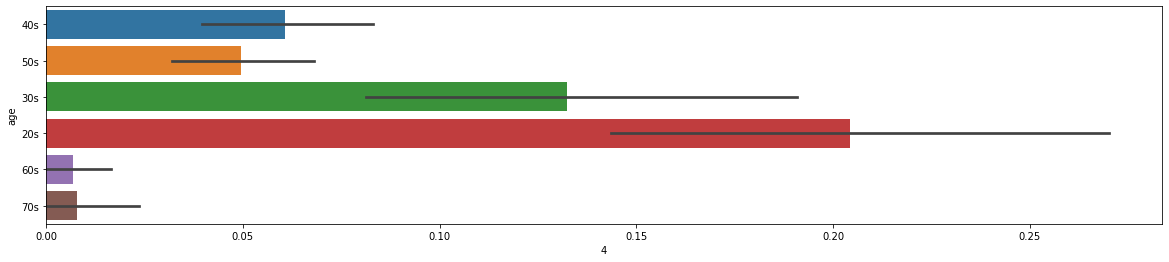

In [19]:
## 나이-점심식사, 앞선 성별 비중에 따라 여성에 한정하여 집중
plt.figure(figsize=(20, 4))
sns.barplot(data=consume_fbehavior, x=4, y='age') # 점심식사 (consume_fbehavior[4] 의 1 값이 많을 수록 1에 가까운 결과가 나옴)

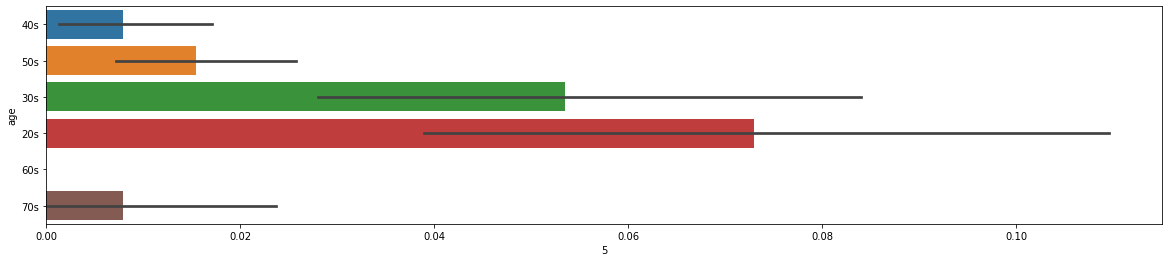

In [20]:
## 나이-저녁식사, 앞선 성별 비중에 따라 여성에 한정하여 집중
plt.figure(figsize=(20, 4))
sns.barplot(data=consume_fbehavior, x=5, y='age')# 저녁식사 (consume_fbehavior[5] 의 1 값이 많을 수록 1에 가까운 결과가 나옴)

##  어느 시간대의 빵류 식사 비중이 가장 높았나?

> 점심, 아침, 저녁 순으로 비중이 높음



아침 식사로 빵류를 섭취하는 인구 :  count    146
Name: breakfast, dtype: int64 
 점심 식사로 빵류를 섭취하는 인구 :  count    237
Name: lunch, dtype: int64 
 저녁 식사로 빵류를 섭취하는 인구 :  count    74
Name: dinner, dtype: int64


<ipython-input-21-1e54825c0fd4>:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(tot_df, labels=labels, autopct="%.2f")


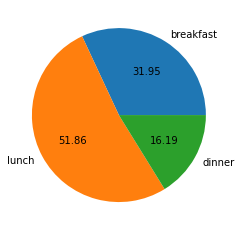

In [21]:
breakfast_tot = consume_fbehavior[3].sum()
lunch_tot = consume_fbehavior[4].sum()
dinner_tot = consume_fbehavior[5].sum()

tot=[{'breakfast': breakfast_tot,'lunch':lunch_tot, 'dinner':dinner_tot}]
tot_df= pd.DataFrame(tot,index=['count'], columns= ['breakfast','lunch','dinner'])
print("아침 식사로 빵류를 섭취하는 인구 : ", tot_df['breakfast'], "\n",
      "점심 식사로 빵류를 섭취하는 인구 : ", tot_df['lunch'], "\n",
      "저녁 식사로 빵류를 섭취하는 인구 : ", tot_df['dinner'])

labels = ["breakfast", "lunch", "dinner"]
plt.pie(tot_df, labels=labels, autopct="%.2f")
plt.show()

# Data 2: 여성 일반군/비만군 시간대별 음식섭취 데이터
얻고자 하는 인사이트:
- 20대 및 그 이하 여성들은 어떤 종류의 디저트를 섭취하는가?
- 구체적으로 어느 시간대에 디저트를 섭취하는가?

데이터 전처리:


*   시간대별 음식 섭취 데이터에 섭취한 음식의 제품이 특정 제품명을 그대로 명시하는 등 비정형적으로 기술되어 있어 이를 케익, 빵, 쿠키, 머핀, 베이글, 파이, 토스트, 와플, 오떡, 마카롱, 도넛으로 분류하여 집계함.


## 20대 및 그 이하 여성들은 어떤 종류의 디저트를 섭취하는가?
* **케익/빵-쿠키/파이-마카롱 순**으로 높게 나타남.

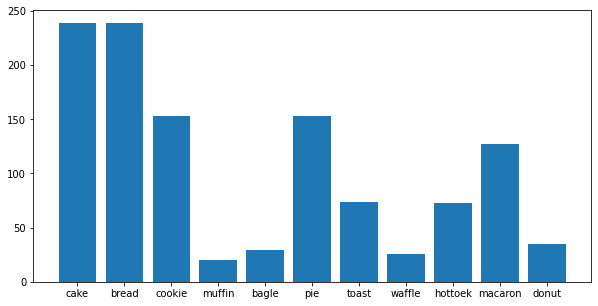

In [22]:
## dessert.csv 파일의 데이터값 사용

#디저트 품목별 섭취량 [0-19], [20-29] 모두
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(11)
item_name = ['cake', 'bread', 'cookie', 'muffin','bagle','pie','toast','waffle','hottoek','macaron','donut']
values = [239,239,153,20,29,153,74,26,73,127,35]

plt.figure(figsize=(10, 5))
plt.bar(x, values)
plt.xticks(x, item_name)

plt.show()

## 구체적으로 어느 시간대에 디저트를 섭취하는가?
* 오후 4시, 3시, 5시, 9시, 2시, 오전 10시, 오후 8시, 11시, 10시, 오전 9시, 8시, 오후 1시 순으로 높게 나타남.

In [23]:
df1=women_eat_time = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/intake_time.csv", encoding="UTF-8")

In [24]:
## 2020 1월 여성 일반군 시간대별 음식섭취 데이터와 여성 비만군 시간대별 음식섭취 데이터 선통합 진행
## 앞서 타깃 대상의 연령대를 고려하여 사용자연령값을 [0-19], [20-29]로 필터
## 음식섭취수-0 필터에서 제외

display(women_eat_time.head())
print(women_eat_time.info())
print(women_eat_time.describe())
## DB 날짜 
## FOODRANKING 음식섭취등수값 
## FOODNAME 음식명
## FOODCOUNT 음식섭취수 
## FOODRATRO 음식섭취비율
## AGE 사용자연령값 
## HOUR 시간

,날짜,음식섭취등수값,음식명,음식섭취수,음식섭취비율,사용자연령값,시간
0,2020-01-01,1,홈런볼 초코,1,14.285714,[0-19],0
1,2020-01-03,1,식빵(쨈),2,5.128205,[20-29],19
2,2020-01-05,1,모닝빵,1,11.111111,[20-29],3
3,2020-01-06,1,팥빵,1,11.111111,[20-29],6
4,2020-01-08,1,식빵,2,5.000000,[0-19],7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       2492 non-null   object 
 1   음식섭취등수값  2492 non-null   int64  
 2   음식명      2492 non-null   object 
 3   음식섭취수    2492 non-null   int64  
 4   음식섭취비율   2492 non-null   float64
 5   사용자연령값   2492 non-null   object 
 6   시간       2492 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 136.4+ KB
None
           음식섭취등수값        음식섭취수       음식섭취비율           시간
count  2492.000000  2492.000000  2492.000000  2492.000000
mean     10.841091     1.268459     4.606378    13.920144
std       5.576988     0.628316     7.925441     6.234386
min       1.000000     1.000000     0.641026     0.000000
25%       6.000000     1.000000     1.724138    10.000000
50%      11.000000     1.000000     2.631579    15.000000
75%      16.000000     1.000000     4.347826    19.000000
max      20.000000 

16    176
15    174
17    165
21    158
14    154
10    148
20    146
23    140
22    131
9     124
8     121
13    114
Name: 시간, dtype: int64


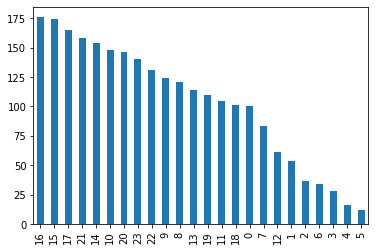

In [25]:
item_count = women_eat_time['시간'].value_counts()
print(item_count[:12])
CountStatus = pd.value_counts(women_eat_time['시간'].values, sort=True)
CountStatus.plot.bar()

In [26]:
table1= pd.pivot_table(df1, index='사용자연령값', values='음식명', aggfunc='count')
table1

,음식명
사용자연령값,
[0-19],1215
[20-29],1277


## cf) 10대와 20대를 분리하여 집계한 상세 분석
* [0-19]의 섭취량은 1215, [20-29]의 섭취량은 1277으로 섭취량에서의 미세한 차이를 보임.
* 전체 합계에서는 16시가 제일 높고,4시가 제일 적음.
* [0-19]의 경우 21시, 23시 순/[20-29]의 경우 16시,17시 순이 제일 높음.
* 품목-연령대별 최다 섭취시간대 정리

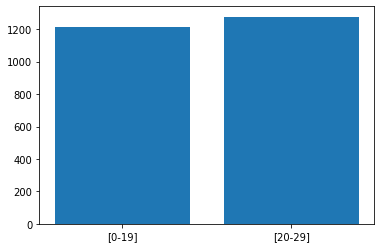

In [27]:
## 연령대별 섭취량
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
sum_age = ['[0-19]','[20-29]']
values = [1215,1277]

plt.bar(x, values)
plt.xticks(x, sum_age)

plt.show()

In [28]:
## 연령별 시간대별 섭취량 
table2 = pd.pivot_table(df1, index='시간', columns='사용자연령값', values='음식명', aggfunc='count')
table2

사용자연령값,[0-19],[20-29]
시간,,
0,69,31
1,33,21
2,14,23
3,11,17
4,7,9
5,4,8
6,8,26
7,37,46
8,65,56


시간대별 케익섭취량
- [0-19]의 경우 21-22시
- [20-29]의 경우 17-18시

시간대별 빵섭취량
- [0-19]의 경우 8-9시/16-17시
- [20-29]의 경우 15-16시, 17-18시

시간대별 쿠키섭취량
- [0-19]의 경우 17-18시
- [20-29]의 경우 15-18시

시간대별 머핀섭취량
- [0-19]의 경우 12-13시/20시
- [20-29]의 경우 20시

시간대별 베이글섭취량
- [0-19]의 경우 15시
- [20-29]의 경우 18시

시간대별 파이섭취량
- [0-19]의 경우 7-8시/12-13시
- [20-29]의 경우 10-11시

시간대별 토스트섭취량
- [0-19]의 경우 19-20시
- [20-29]의 경우 9-10시

시간대별 와플섭취량
- [0-19]의 경우 20-23시
- [20-29]의 경우 13-14시

시간대별 호떡섭취량
- [0-19]의 경우 21-22시
- [20-29]의 경우 17-18시

시간대별 마카롱섭취량
- [0-19]의 경우 16-17시
- [20-29]의 경우 14-15시

시간대별 도넛섭취량
- [0-19]의 경우 13-14시
- [20-29]의 경우 15-16시

# Data 3: 주문지역 인구특성
얻고자 하는 인사이트:


*   주요 서비스 대상으로 설정할 지역(대상 연령대가 많이 거주하는 지역)은 어디인가?

##  주 타겟인 20대 내외 여성이 어느 지역에 많이 사는가?



* "주문지역 인구특성" 데이터셋의 2019년과 2020년 통계 결과를 분석한 결과, 여성인구가 가장 많은 Top3 지역은 중구, 강서구, 송파구로 나타남
* 이에 해당 세 지역 내 연령층 비율을 살펴봄



In [29]:
# 주문지역 인구특성 (population_preprocessed.csv) 데이터 가져오기
population = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/population_preprocessed.csv")

display(population.head())
population.info()

,서울 지역(2019),여성총인구수(2019),서울 지역(2020),여성총인구수(2020),연령층(2019 중구),여성인구수(2019 중구),연령층(2020 중구),여성인구수(2020 중구),연령층(2019 강서구),여성인구수(2019 강서구),연령층(2020 강서구),여성인구수(2020 강서구),연령층(2019 송파구),여성인구수(2019 송파구),연령층(2020 송파구),여성인구수(2020 송파구)
0,강남구,3398415,강남구,1702409,20대 미만,88933.0,20대 미만,42777.0,20대 미만,549255.0,20대 미만,262385.0,20대 미만,682097.0,20대 미만,330533.0
1,강동구,2593172,강동구,1373252,20대,48997.0,20대,24755.0,20대,226332.0,20대,110766.0,20대,258378.0,20대,127031.0
2,강북구,1938175,강북구,961096,30대,60739.0,30대,30631.0,30대,300764.0,30대,149303.0,30대,342572.0,30대,170940.0
3,강서구,4412811,강서구,2204841,40대,50540.0,40대,25270.0,40대,271280.0,40대,135448.0,40대,328114.0,40대,166306.0
4,관악구,3000319,관악구,1492584,50대 이상,519790.0,50대 이상,262577.0,50대 이상,2328460.0,50대 이상,1166820.0,50대 이상,2577030.0,50대 이상,1293784.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   서울 지역(2019)      25 non-null     object 
 1   여성총인구수(2019)     25 non-null     int64  
 2   서울 지역(2020)      25 non-null     object 
 3   여성총인구수(2020)     25 non-null     int64  
 4   연령층(2019 중구)     5 non-null      object 
 5   여성인구수(2019 중구)   5 non-null      float64
 6   연령층(2020 중구)     5 non-null      object 
 7   여성인구수(2020 중구)   5 non-null      float64
 8   연령층(2019 강서구)    5 non-null      object 
 9   여성인구수(2019 강서구)  5 non-null      float64
 10  연령층(2020 강서구)    5 non-null      object 
 11  여성인구수(2020 강서구)  5 non-null      float64
 12  연령층(2019 송파구)    5 non-null      object 
 13  여성인구수(2019 송파구)  5 non-null      float64
 14  연령층(2020 송파구)    5 non-null      object 
 15  여성인구수(2020 송파구)  5 non-null      float64
dtypes: float64(6), int64(2), object(8)
memory usage: 3.2+ KB


In [30]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

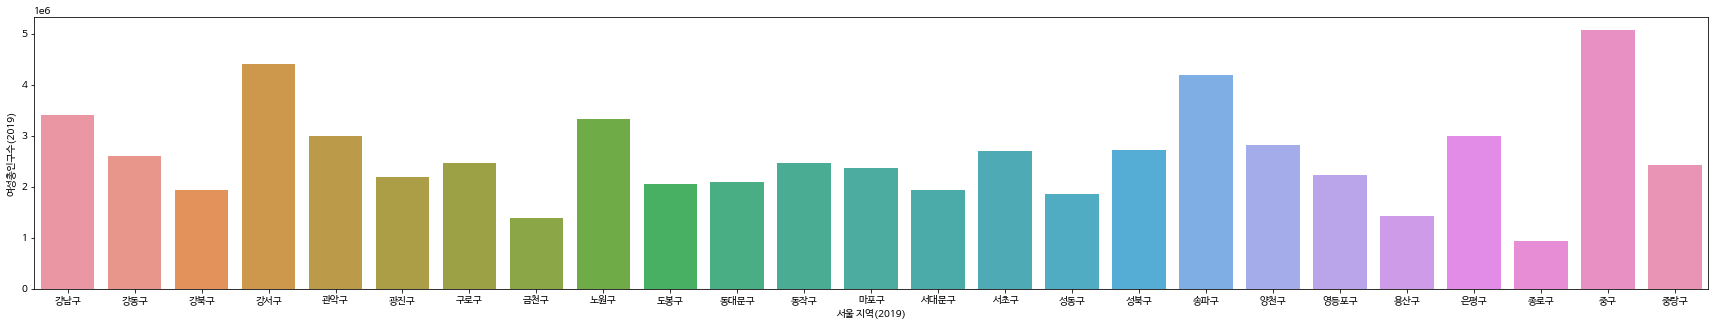

In [31]:
# 서울특별시 구별 여성인구 비교 (2019년)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize = (30,5))
sns.barplot(data = population, x = '서울 지역(2019)', y = '여성총인구수(2019)')
plt.show()

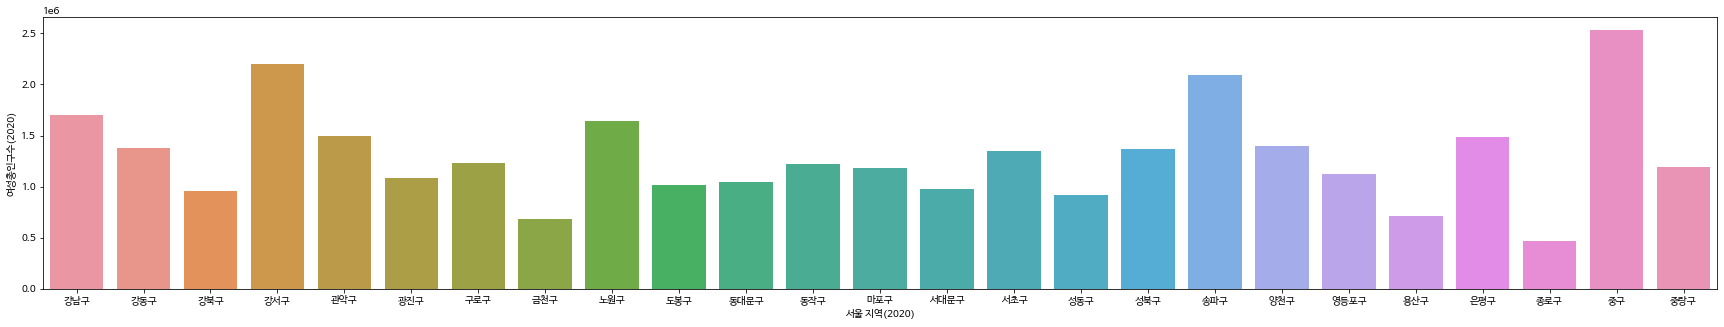

In [32]:
# 서울특별시 구별 여성인구 비교 (2020년)
plt.figure(figsize = (30,5))
sns.barplot(data = population, x = '서울 지역(2020)', y = '여성총인구수(2020)')
plt.show()

### 중구, 강서구, 송파구 세 지역 내 연령층 비율

In [33]:
population

,서울 지역(2019),여성총인구수(2019),서울 지역(2020),여성총인구수(2020),연령층(2019 중구),여성인구수(2019 중구),연령층(2020 중구),여성인구수(2020 중구),연령층(2019 강서구),여성인구수(2019 강서구),연령층(2020 강서구),여성인구수(2020 강서구),연령층(2019 송파구),여성인구수(2019 송파구),연령층(2020 송파구),여성인구수(2020 송파구)
0,강남구,3398415,강남구,1702409,20대 미만,88933.0,20대 미만,42777.0,20대 미만,549255.0,20대 미만,262385.0,20대 미만,682097.0,20대 미만,330533.0
1,강동구,2593172,강동구,1373252,20대,48997.0,20대,24755.0,20대,226332.0,20대,110766.0,20대,258378.0,20대,127031.0
2,강북구,1938175,강북구,961096,30대,60739.0,30대,30631.0,30대,300764.0,30대,149303.0,30대,342572.0,30대,170940.0
3,강서구,4412811,강서구,2204841,40대,50540.0,40대,25270.0,40대,271280.0,40대,135448.0,40대,328114.0,40대,166306.0
4,관악구,3000319,관악구,1492584,50대 이상,519790.0,50대 이상,262577.0,50대 이상,2328460.0,50대 이상,1166820.0,50대 이상,2577030.0,50대 이상,1293784.0
5,광진구,2183358,광진구,1085229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,구로구,2460167,구로구,1231297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,금천구,1379795,금천구,687463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,노원구,3324862,노원구,1644595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,도봉구,2061230,도봉구,1015952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


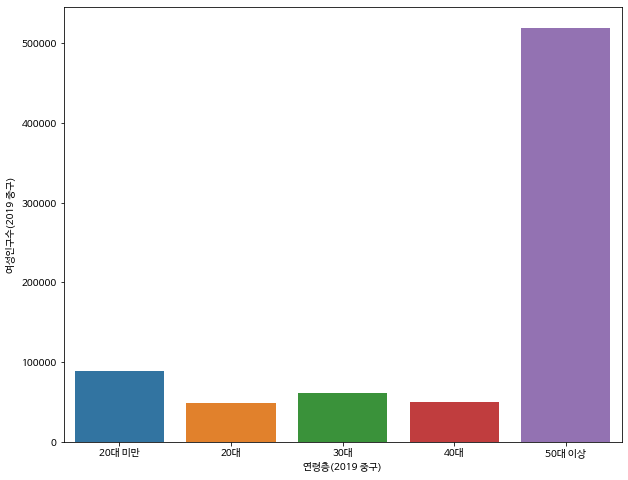

In [34]:
# 서울특별시 중구 여성 연령층 비율 (2019년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2019 중구)', y = '여성인구수(2019 중구)')

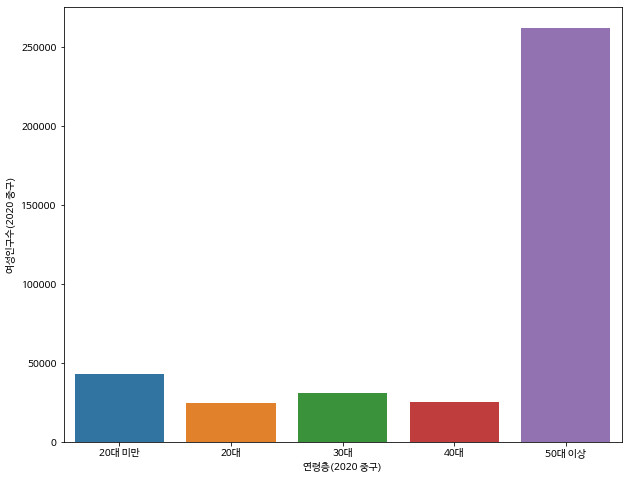

In [35]:
# 서울특별시 중구 여성 연령층 비율 (2020년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2020 중구)', y = '여성인구수(2020 중구)')

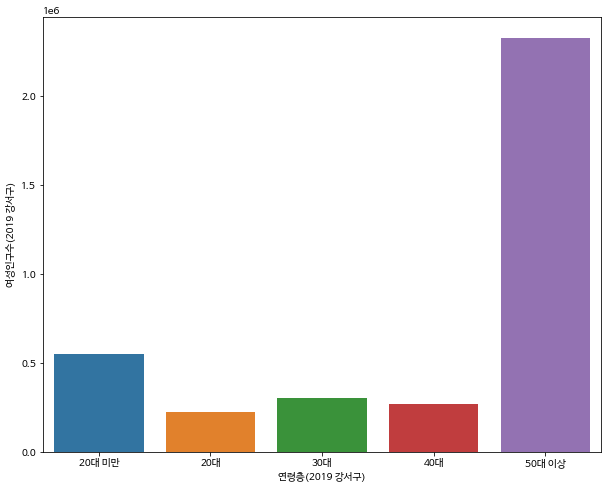

In [36]:
# 서울특별시 강서구 여성 연령층 비율 (2019년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2019 강서구)', y = '여성인구수(2019 강서구)')

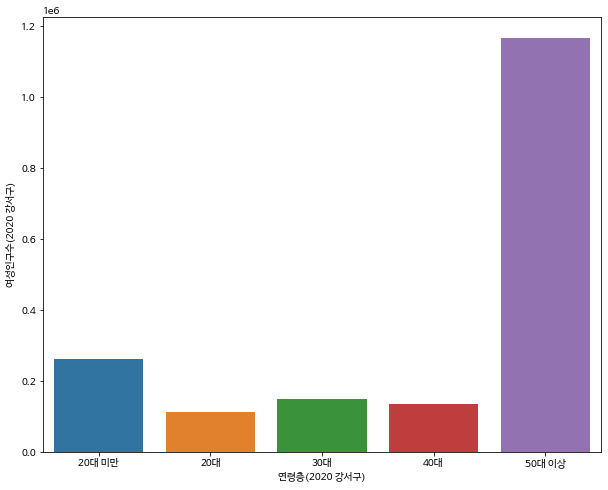

In [37]:
# 서울특별시 강서구 여성 연령층 비율 (2020년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2020 강서구)', y = '여성인구수(2020 강서구)')

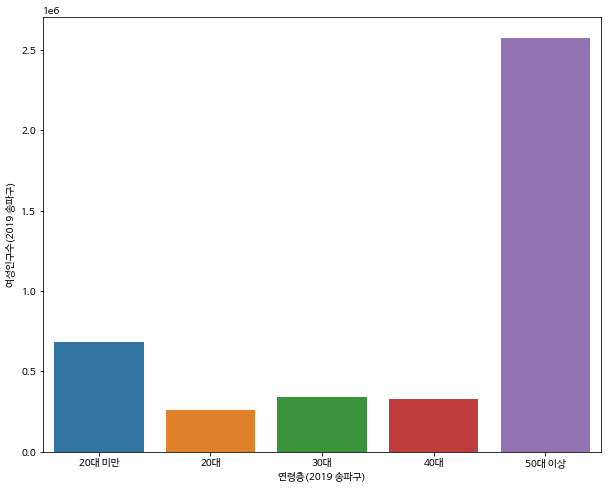

In [38]:
# 서울특별시 송파구 여성 연령층 비율 (2019년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2019 송파구)', y = '여성인구수(2019 송파구)')

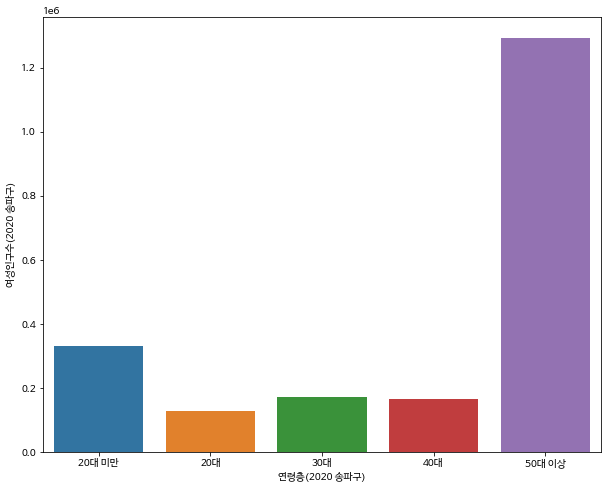

In [39]:
# 서울특별시 송파구 여성 연령층 비율 (2020년)
plt.figure(figsize = (10,8))
sns.barplot(data = population, x = '연령층(2020 송파구)', y = '여성인구수(2020 송파구)')

# Data 4 : 업종 목적지별 배달 주문건수 & 요일별 배달 주문건수
얻고자 하는 인사이트:


*   어떤 요일에 배달 관련 프로모션을 할 수 있을 것인가?


## 지역별로 어떤 시간대에 디저트를 가장 많이 주문하는가?

*   "업종 목적지별 배달 주문건수" 데이터셋의 2020년 결과를 분석한 결과, 서울특별시 기준 배달 주문건수가 가장 많은 시간대는 오후 8시, 오후 3시, 오전 10시 순으로 나타났다. 그중에서 강서구의 경우 정오, 오후 3시, 오후 8시, 오후 10시에 가장 많은 배달 주문건수를 보였다. 


In [40]:
# destination_preprocessed.csv 파일 불러오기
destination = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/destination_preprocessed.csv")
display(destination.head())
destination.info()

,날짜,시간대별시간,업종명,목적지광역시도명,목적지시군구명,주문건수,시간대별시간(강서구),주문건수(강서구)
0,2020-01-01,0,카페/디저트,서울특별시,구로구,1,10.0,1.0
1,2020-01-01,1,카페/디저트,서울특별시,구로구,2,19.0,1.0
2,2020-01-01,1,카페/디저트,서울특별시,금천구,1,22.0,1.0
3,2020-01-01,10,카페/디저트,서울특별시,강서구,1,22.0,1.0
4,2020-01-01,10,카페/디저트,서울특별시,관악구,1,17.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20907 entries, 0 to 20906
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   날짜           20907 non-null  object 
 1   시간대별시간       20907 non-null  int64  
 2   업종명          20907 non-null  object 
 3   목적지광역시도명     20907 non-null  object 
 4   목적지시군구명      20907 non-null  object 
 5   주문건수         20907 non-null  int64  
 6   시간대별시간(강서구)  244 non-null    float64
 7   주문건수(강서구)    241 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.3+ MB


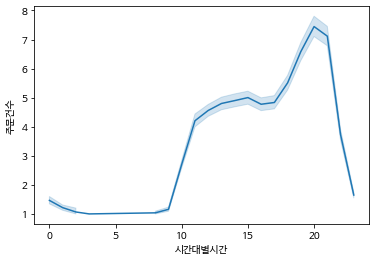

In [41]:
# 서울특별시 배달 주문건수가 가장 많은 시간대
sns.lineplot(data = destination, x = '시간대별시간', y = '주문건수')

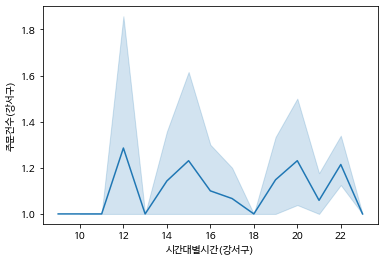

In [42]:
# 서울특별시 강서구 배달 주문건수가 가장 많은 시간대 (중구, 송파구 정보는 해당 데이터셋에 없음)
sns.lineplot(data = destination, x = '시간대별시간(강서구)', y = '주문건수(강서구)')

## 지역별로 어떤 요일에 디저트를 가장 많이 주문하는가?


*  "요일별 배달 주문건수" 데이터셋을 분석한 결과 배달 주문건수가 가장 많은 요일은 금요일, 목요일, 일요일 순으로 나타났다.이는 강서구에서도 같은 결과로 나타났으며 송파구의 경우 화요일, 월요일에 가장 많은 배달 주문건수를 보였다.



In [43]:
# day_preprocessed.csv 파일 불러오기
day = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/day_preprocessed.csv")
display(day.head())
day.info()

,시간대별시간,주문요일명,광역시도명,시군구명,업종명,주문요일(전처리),시간대(강서구),주문요일(강서구),주문요일전처리(강서구),시간대(송파구),주문요일(송파구),주문요일전처리(송파구)
0,10,수요일,서울특별시,도봉구,카페/디저트,평일,12.0,수요일,평일,14.0,토요일,주말
1,10,수요일,서울특별시,구로구,카페/디저트,평일,12.0,수요일,평일,15.0,토요일,주말
2,10,수요일,서울특별시,양천구,카페/디저트,평일,12.0,수요일,평일,15.0,토요일,주말
3,10,수요일,서울특별시,구로구,카페/디저트,평일,12.0,수요일,평일,16.0,토요일,주말
4,10,수요일,서울특별시,구로구,카페/디저트,평일,12.0,수요일,평일,16.0,토요일,주말


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27313 entries, 0 to 27312
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시간대별시간        27313 non-null  int64  
 1   주문요일명         27313 non-null  object 
 2   광역시도명         27313 non-null  object 
 3   시군구명          27313 non-null  object 
 4   업종명           27313 non-null  object 
 5   주문요일(전처리)     27313 non-null  object 
 6   시간대(강서구)      14850 non-null  float64
 7   주문요일(강서구)     14850 non-null  object 
 8   주문요일전처리(강서구)  27313 non-null  object 
 9   시간대(송파구)      2186 non-null   float64
 10  주문요일(송파구)     2186 non-null   object 
 11  주문요일전처리(송파구)  27313 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.5+ MB


In [44]:
# 서울특별시 배달 주문건수가 가장 많은 요일
# 요일별 빈도표
df_day = day.groupby('주문요일명', as_index = False).agg(n = ('주문요일명', 'count'))
df_day

,주문요일명,n
0,금요일,5229
1,목요일,4369
2,수요일,3975
3,월요일,3374
4,일요일,4446
5,토요일,2627
6,화요일,3293


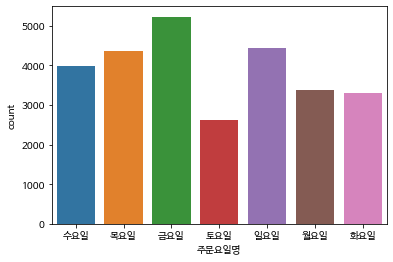

In [45]:
# 요일별 빈도표 막대 그래프로 표현
sns.countplot(data = day, x = '주문요일명')

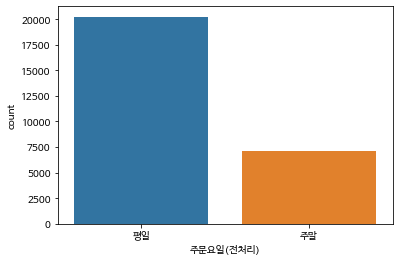

In [46]:
# 서울특별시 배달 주문건수가 가장 많은 요일 (평일과 주말로 나눠서서)
sns.countplot(data = day, x = '주문요일(전처리)')

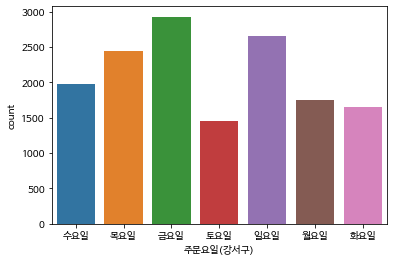

In [47]:
# 서울특별시 강서구 배달 주문건수가 가장 많은 요일
sns.countplot(data = day, x = '주문요일(강서구)')

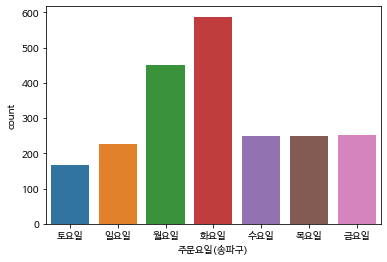

In [48]:
# 서울특별시 송파구 배달 주문건수가 가장 많은 요일
sns.countplot(data = day, x = '주문요일(송파구)')

# Data 5: 날씨별 배달품목차이
얻고자 하는 인사이트:


*   어떤 날씨일 때에 프로모션을 할 수 있을 것인가?


데이터 전처리: 
*  서울의 강수량, 강수유형, 기온, 카페 디저트의 배달건수의 데이터가 필요하기 때문에 해당 값들로 이루어진 테이블을 새로 생성한다.

 - weather 테이블에서 서울특별시에 해당하는 데이터들만 남기고 다른 광역시도들의 데이터를 삭제한다
 - 위의 과정이 완료된 weather 테이블에서 강수량, 강수유형, 기온, 카페/디저트의 배달 건수의 데이터들을 가지고 새로운 데이터프레임 "we_dessert"를 생성한다.
 - 기온 범주화: 15부터 40도까지 5도 단위로 나누어 1~11의 범주를 지정해주었다.

    - -15 ~ -10 ) 0
    - -10 ~ -5 )1
    - -5 ~ 0 ) 2
    - 0 ~ 5 ) 3
    - 5 ~ 10 ) 4
    - 10 ~ 15 ) 5
    - 15 ~ 20 ) 6
    - 20 ~ 25 ) 7
    - 25 ~ 30 )  8
    - 30 ~ 35  ) 9
    - 35 ~ 40 ) 10
 - 기상청에서 표현하는 강수 표현에 따라 칼럼 명명
    - 3mm 미만의 비 : 약한 비 (less)
    - 3~15mm 의 비 : 보통 비 (rain)
    - 15mm 이상의 비 : 강한 비 (str_rain)
    - 30mm 이상의 비 : 매우 강한 비 (vstr_rain)
    - 진눈개비 : sleet
    - 눈 : snow
    - 없음 : none

In [49]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
# 2020.1~ 2020.06 의 데이터 와 2020.7 ~ 2021.07
weather1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200101000000.csv")
weather7 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv")

weather1.columns = ['BRTC_NM','SIGNGU_NM','DATE','HRLY_TIME','PRCPT_RY_NM','HD_VALUE','PRCPT_QY_VALUE','TMPRT_VALUE','WS_VALUE','WIND_IN_TY_NM','EAST_WST_WIND','WD_VALUE','WD_CTGRY_NM','KORFD','SNACK','CAFE','PKCUT','SLICEFISH','CHICKEN','PIZZA','ASIAN','CHINE','JOKB','MIDNI','STEAM','LUNCHB','FASTF']
weather7.columns = ['BRTC_NM','SIGNGU_NM','DATE','HRLY_TIME','PRCPT_RY_NM','HD_VALUE','PRCPT_QY_VALUE','TMPRT_VALUE','WS_VALUE','WIND_IN_TY_NM','EAST_WST_WIND','WD_VALUE','WD_CTGRY_NM','KORFD','SNACK','CAFE','PKCUT','SLICEFISH','CHICKEN','PIZZA','ASIAN','CHINE','JOKB','MIDNI','STEAM','LUNCHB','FASTF']

weather = pd.concat([weather1,weather7])

weather.info()
weather.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 225445 entries, 0 to 34629
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BRTC_NM         225445 non-null  object 
 1   SIGNGU_NM       225445 non-null  object 
 2   DATE            225445 non-null  object 
 3   HRLY_TIME       225445 non-null  int64  
 4   PRCPT_RY_NM     225445 non-null  object 
 5   HD_VALUE        225445 non-null  float64
 6   PRCPT_QY_VALUE  225445 non-null  float64
 7   TMPRT_VALUE     225445 non-null  float64
 8   WS_VALUE        225445 non-null  float64
 9   WIND_IN_TY_NM   225445 non-null  object 
 10  EAST_WST_WIND   225445 non-null  object 
 11  WD_VALUE        225445 non-null  int64  
 12  WD_CTGRY_NM     225445 non-null  object 
 13  KORFD           225445 non-null  int64  
 14  SNACK           225445 non-null  int64  
 15  CAFE            225445 non-null  int64  
 16  PKCUT           225445 non-null  int64  
 17  SLICEFISH  

,HRLY_TIME,HD_VALUE,PRCPT_QY_VALUE,TMPRT_VALUE,WS_VALUE,WD_VALUE,KORFD,SNACK,CAFE,PKCUT,SLICEFISH,CHICKEN,PIZZA,ASIAN,CHINE,JOKB,MIDNI,STEAM,LUNCHB,FASTF
count,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000,225445.000000
mean,14.737071,73.350693,0.162207,11.575067,1.333366,177.936419,4.115975,3.613329,2.799787,1.437898,0.585158,6.902105,1.495260,0.684047,1.074519,3.193080,1.321276,1.257003,0.357258,2.040232
std,5.831659,20.436218,1.099685,9.223255,1.138591,109.203861,10.594280,7.738303,5.100754,4.128293,1.897839,17.465594,3.547173,1.985950,3.437072,11.196237,4.521750,3.713121,1.542004,4.633748
min,0.000000,-1.000000,-0.400000,-18.700000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,60.000000,0.000000,3.900000,0.500000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,76.000000,0.000000,11.300000,1.100000,191.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,91.000000,0.000000,20.000000,1.900000,274.000000,4.000000,3.000000,3.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,23.000000,100.000000,47.500000,36.100000,16.600000,360.000000,258.000000,128.000000,68.000000,69.000000,46.000000,329.000000,58.000000,36.000000,64.000000,301.000000,107.000000,71.000000,60.000000,67.000000


In [52]:
print("결측치 개수:") 
weather.isnull().sum()

결측치 개수:


BRTC_NM           0
SIGNGU_NM         0
DATE              0
HRLY_TIME         0
PRCPT_RY_NM       0
HD_VALUE          0
PRCPT_QY_VALUE    0
TMPRT_VALUE       0
WS_VALUE          0
WIND_IN_TY_NM     0
EAST_WST_WIND     0
WD_VALUE          0
WD_CTGRY_NM       0
KORFD             0
SNACK             0
CAFE              0
PKCUT             0
SLICEFISH         0
CHICKEN           0
PIZZA             0
ASIAN             0
CHINE             0
JOKB              0
MIDNI             0
STEAM             0
LUNCHB            0
FASTF             0
dtype: int64

In [53]:
idx = weather[weather['BRTC_NM']!="서울특별시"].index
weather.drop(idx,inplace=True)
weather

,BRTC_NM,SIGNGU_NM,DATE,HRLY_TIME,PRCPT_RY_NM,HD_VALUE,PRCPT_QY_VALUE,TMPRT_VALUE,WS_VALUE,WIND_IN_TY_NM,...,SLICEFISH,CHICKEN,PIZZA,ASIAN,CHINE,JOKB,MIDNI,STEAM,LUNCHB,FASTF
126496,서울특별시,강남구,2020-01-02,11,없음,68.0,0.0,2.9,0.3,약,...,0,0,0,0,0,1,0,0,0,0
126497,서울특별시,강남구,2020-01-02,12,없음,69.0,0.0,2.8,1.2,약,...,0,0,0,0,0,2,0,0,0,0
126498,서울특별시,강남구,2020-01-02,13,없음,71.0,0.0,2.6,1.4,약,...,0,0,0,0,0,2,0,0,0,0
126499,서울특별시,강남구,2020-01-03,10,없음,45.0,0.0,3.0,1.8,약,...,0,0,0,0,0,2,0,0,0,0
126500,서울특별시,강남구,2020-01-03,15,없음,68.0,0.0,0.6,0.0,약,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158504,서울특별시,중랑구,2020-06-29,18,비,82.0,10.5,18.8,1.7,약,...,0,0,0,0,0,0,0,0,0,0
158505,서울특별시,중랑구,2020-06-29,20,비,86.0,10.0,18.2,0.6,약,...,0,0,0,0,0,0,0,0,0,0
158506,서울특별시,중랑구,2020-06-30,12,없음,83.0,0.0,18.0,0.6,약,...,0,0,0,0,0,0,0,0,0,0
158507,서울특별시,중랑구,2020-06-30,13,없음,79.0,0.0,18.3,1.4,약,...,0,0,0,0,0,0,0,0,0,0


In [54]:
we_dessert = weather.filter(['PRCPT_RY_NM','PRCPT_QY_VALUE','TMPRT_VALUE','CAFE'])
we_dessert.info()
we_dessert.isnull().sum()
we_dessert.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32013 entries, 126496 to 158508
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRCPT_RY_NM     32013 non-null  object 
 1   PRCPT_QY_VALUE  32013 non-null  float64
 2   TMPRT_VALUE     32013 non-null  float64
 3   CAFE            32013 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE
count,32013.000000,32013.000000,32013.000000
mean,0.081473,10.346406,2.605754
std,0.612208,8.881391,4.603025
min,0.000000,-13.900000,0.000000
25%,0.000000,3.500000,0.000000
50%,0.000000,9.200000,0.000000
75%,0.000000,17.900000,3.000000
max,19.000000,36.100000,48.000000


In [55]:
## 기온 범주화

we_dessert.loc[we_dessert['TMPRT_VALUE']<-10,'TMP'] = '0'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=-10)&(we_dessert['TMPRT_VALUE']<-5),'TMP'] = '1'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=-5)&(we_dessert['TMPRT_VALUE']<0),'TMP'] = '2'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=0)&(we_dessert['TMPRT_VALUE']<5),'TMP'] = '3'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=5)&(we_dessert['TMPRT_VALUE']<10),'TMP'] = '4'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=10)&(we_dessert['TMPRT_VALUE']<15),'TMP'] = '5'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=15)&(we_dessert['TMPRT_VALUE']<20),'TMP'] = '6'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=20)&(we_dessert['TMPRT_VALUE']<25),'TMP'] = '7'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=25)&(we_dessert['TMPRT_VALUE']<30),'TMP'] = '8'
we_dessert.loc[(we_dessert['TMPRT_VALUE']>=30)&(we_dessert['TMPRT_VALUE']<35),'TMP'] = '9'
we_dessert.loc[we_dessert['TMPRT_VALUE']>=35,'TMP'] = '10'

we_dessert

,PRCPT_RY_NM,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE,TMP
126496,없음,0.0,2.9,0,3
126497,없음,0.0,2.8,0,3
126498,없음,0.0,2.6,0,3
126499,없음,0.0,3.0,0,3
126500,없음,0.0,0.6,0,3
...,...,...,...,...,...
158504,비,10.5,18.8,1,6
158505,비,10.0,18.2,2,6
158506,없음,0.0,18.0,1,6
158507,없음,0.0,18.3,1,6


In [56]:
## 날씨 칼럼 명명

we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='없음'),'PRCPT'] = 'sunny'
we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='눈'),'PRCPT'] = 'snow'
we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='진눈개비'),'PRCPT'] = 'sleet'
we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='비') & (we_dessert['PRCPT_QY_VALUE']<3.0),'PRCPT'] ='less'
we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='비') & (we_dessert['PRCPT_QY_VALUE']>=3)&(we_dessert['PRCPT_QY_VALUE']<15),'PRCPT'] ='rain'
we_dessert.loc[(we_dessert['PRCPT_RY_NM']=='비') & (we_dessert['PRCPT_QY_VALUE']>=15)&(we_dessert['PRCPT_QY_VALUE']<30),'PRCPT'] ='str_rain'


we_dessert.head()
from patsy import dmatrix
dm = dmatrix("C(PRCPT,levels=['sunny','less','rain','str_rain','snow','sleet']) + 0",we_dessert)
dm


DesignMatrix with shape (32013, 6)
  Columns:
    ["C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[sunny]",
     "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[less]",
     "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[rain]",
     "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[str_rain]",
     "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[snow]",
     "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])[sleet]"]
  Terms:
    "C(PRCPT, levels=['sunny', 'less', 'rain', 'str_rain', 'snow', 'sleet'])" (columns 0:6)
  (to view full data, use np.asarray(this_obj))

In [57]:
import numpy as np
np.asarray(dm)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

## 날씨에 따른 카페/디저트 배달


*   PRCPT 가 sunny일 때  TMP의 분포 양과 PRCPT가 sunny가 아닐 때 TMP의 분포양의 차이가 큼을 확인할 수 있다. 따라서, 독립변수를 TMP, 종속변수를 CAFE로 두고 기온과 CAFE 주문량의 관계를 분석하고, PRCPT가 sunny가 아닐 때 (즉, 강수량이 있는 경우), 강수 유형과 강수량 - CAFE 주문량과의 관계성을 분석한다.



*   강수량이 없는 경우, TMP가 2 ~ 8 일 때 즉, -5 ~ 30도 일때 가장 주문량이 많으며, 특히 20 ~ 25도의 구간에서 가장 주문량이 많음 을 확인 할 수 있다. 

*    시각화 결과를 통해 눈이 올때 디저트를 배달시켜먹는 사람들이 많음을 확일할 수 있으며 적은 비보다는 3~15mm 정도의 보통수준의 강수량의 비가 내리고 있을 때 3mm 미만의 비가 내릴 때보다 더 디저트를 많이 배달 시켜먹음을 확인 할 수 있다. 

0     16363
1      4238
2      2361
3      1537
4      1217
5       946
6       831
7       650
8       599
9       482
10      424
11      389
12      299
13      278
15      217
14      215
16      164
17      152
18      116
19      107
20       77
21       57
22       57
23       48
24       45
26       29
25       28
27       23
28       13
30       13
29        8
33        6
31        6
32        5
36        4
34        2
35        2
42        1
41        1
37        1
38        1
48        1
Name: CAFE, dtype: int64


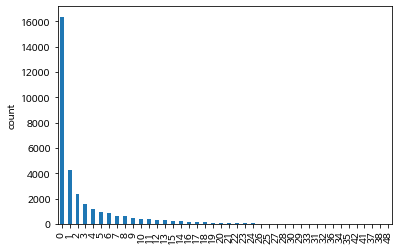

In [58]:
print(we_dessert['CAFE'].value_counts())

we_dessert['CAFE'].value_counts().plot.bar()
plt.ylabel('count')
plt.show()

In [59]:
# 디저트 주문개수가 0개인 데이터는 제거
zero = we_dessert[we_dessert['CAFE']==0].index
we_dessert.drop(zero,inplace=True)
we_dessert

,PRCPT_RY_NM,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE,TMP,PRCPT
127659,없음,0.0,-0.2,1,2,sunny
127661,없음,0.0,-0.2,1,2,sunny
127662,없음,0.0,0.0,2,3,sunny
127663,없음,0.0,0.0,2,3,sunny
127665,없음,0.0,0.1,1,3,sunny
...,...,...,...,...,...,...
158504,비,10.5,18.8,1,6,rain
158505,비,10.0,18.2,2,6,rain
158506,없음,0.0,18.0,1,6,sunny
158507,없음,0.0,18.3,1,6,sunny


In [60]:
over = we_dessert[we_dessert['CAFE']>30].index
we_dessert.drop(over,inplace=True)
we_dessert 

,PRCPT_RY_NM,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE,TMP,PRCPT
127659,없음,0.0,-0.2,1,2,sunny
127661,없음,0.0,-0.2,1,2,sunny
127662,없음,0.0,0.0,2,3,sunny
127663,없음,0.0,0.0,2,3,sunny
127665,없음,0.0,0.1,1,3,sunny
...,...,...,...,...,...,...
158504,비,10.5,18.8,1,6,rain
158505,비,10.0,18.2,2,6,rain
158506,없음,0.0,18.0,1,6,sunny
158507,없음,0.0,18.3,1,6,sunny


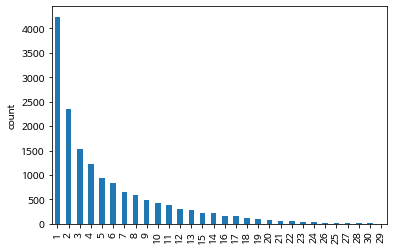

In [61]:
we_dessert['CAFE'].value_counts().plot.bar()
plt.ylabel('count')
plt.show()

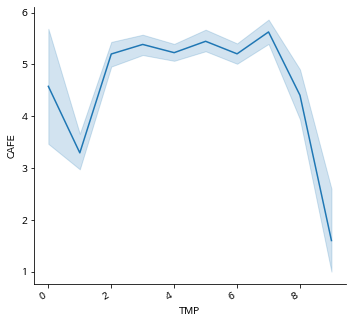

In [62]:
we_dessert['TMP'] = pd.to_numeric(we_dessert['TMP']) #TMP가 오름차순으로 정렬되어 출력되도록 하기위해 int로 변환

tmp_cafe = sns.relplot(x='TMP', y = 'CAFE', kind="line",data =we_dessert)
tmp_cafe.fig.autofmt_xdate()

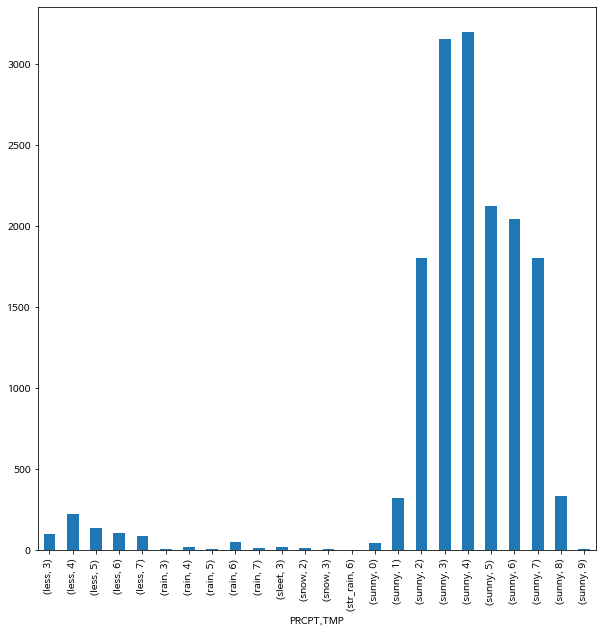

In [63]:
prcpt = we_dessert.groupby(['PRCPT','TMP'])['PRCPT'].count()
prcpt.plot(kind ="bar",figsize = (10,10))
plt.show()

In [64]:
sunny = we_dessert[we_dessert['PRCPT']!= "sunny"].index
we_sunny = we_dessert.drop(sunny)
we_sunny

,PRCPT_RY_NM,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE,TMP,PRCPT
127659,없음,0.0,-0.2,1,2,sunny
127661,없음,0.0,-0.2,1,2,sunny
127662,없음,0.0,0.0,2,3,sunny
127663,없음,0.0,0.0,2,3,sunny
127665,없음,0.0,0.1,1,3,sunny
...,...,...,...,...,...,...
158502,없음,0.0,19.2,1,6,sunny
158503,없음,0.0,22.6,2,7,sunny
158506,없음,0.0,18.0,1,6,sunny
158507,없음,0.0,18.3,1,6,sunny


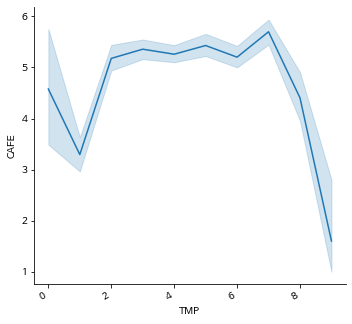

In [65]:
we_sunny['TMP'] = pd.to_numeric(we_sunny['TMP']) #TMP가 오름차순으로 정렬되어 출력되도록 하기위해 int로 변환
tmp_cafe = sns.relplot(x='TMP', y = 'CAFE', kind="line",data =we_sunny)
tmp_cafe.fig.autofmt_xdate()

## 강수량이 없는 경우, TMP가 2 ~ 8 일 때 즉, -5 ~ 30도 일때 가장 주문량이 많으며, 특히 20 ~ 25도의 구간에서 가장 주문량이 많음

In [66]:
rain = we_dessert[we_dessert['PRCPT']== "sunny"].index
we_nosun = we_dessert.drop(rain)
we_nosun

,PRCPT_RY_NM,PRCPT_QY_VALUE,TMPRT_VALUE,CAFE,TMP,PRCPT
129100,비,2.0,4.9,2,3,less
129102,비,3.0,5.8,2,4,rain
129248,비,2.5,4.9,1,3,less
129249,진눈개비,1.5,1.8,1,3,sleet
129250,진눈개비,2.0,1.0,1,3,sleet
...,...,...,...,...,...,...
158486,비,0.5,20.0,2,7,less
158487,비,0.5,19.8,1,6,less
158488,비,0.0,19.0,1,6,less
158504,비,10.5,18.8,1,6,rain


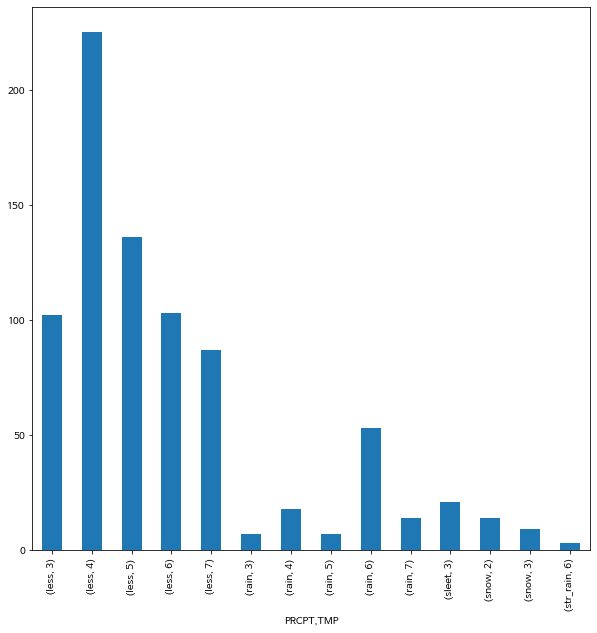

In [67]:
prcpt = we_nosun.groupby(['PRCPT','TMP'])['PRCPT'].count()
prcpt.plot(kind ="bar",figsize = (10,10))
plt.show()

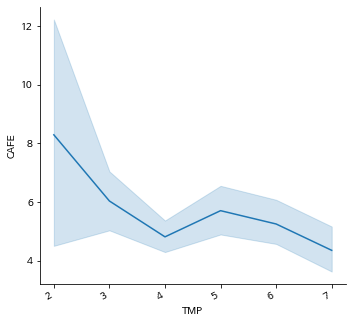

In [68]:
we_nosun['TMP'] = pd.to_numeric(we_nosun['TMP']) #TMP가 오름차순으로 정렬되어 출력되도록 하기위해 int로 변환
tmp_cafe = sns.relplot(x='TMP', y = 'CAFE', kind="line",data =we_nosun)
tmp_cafe.fig.autofmt_xdate()

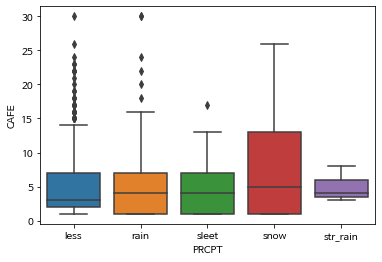

In [69]:
sns.boxplot(x='PRCPT',y = 'CAFE', data=we_nosun)

In [70]:
avg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/KGU_3rd_ORIGIN_KGUDSTNAMOUNT_20200101000000.csv",encoding = 'utf8')
avg.columns = ['DATE','TIME','INDUTY','BRTC','SIGUNGU','ORDER']
avg.info()
avg.describe()
avg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015380 entries, 0 to 2015379
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   DATE     object
 1   TIME     int64 
 2   INDUTY   object
 3   BRTC     object
 4   SIGUNGU  object
 5   ORDER    int64 
dtypes: int64(2), object(4)
memory usage: 92.3+ MB


,DATE,TIME,INDUTY,BRTC,SIGUNGU,ORDER
0,2020-01-01,0,돈까스/일식,경기도,광명시,36167
1,2020-01-01,0,돈까스/일식,경기도,부천시,47333
2,2020-01-01,0,돈까스/일식,경기도,의정부시,30343
3,2020-01-01,0,돈까스/일식,전라북도,군산시,44000
4,2020-01-01,0,돈까스/일식,제주특별자치도,서귀포시,41000


In [71]:
idx = avg[avg['BRTC']!="서울특별시"].index
avg.drop(idx,inplace=True)
avg

,DATE,TIME,INDUTY,BRTC,SIGUNGU,ORDER
18,2020-01-01,0,분식,서울특별시,관악구,4800
19,2020-01-01,0,분식,서울특별시,구로구,19800
20,2020-01-01,0,분식,서울특별시,금천구,15300
21,2020-01-01,0,분식,서울특별시,노원구,24225
43,2020-01-01,0,야식,서울특별시,구로구,30750
...,...,...,...,...,...,...
2015347,2020-12-31,23,한식,서울특별시,은평구,4547
2015373,2020-12-31,23,회,서울특별시,강서구,66800
2015374,2020-12-31,23,회,서울특별시,구로구,37698
2015375,2020-12-31,23,회,서울특별시,양천구,31800


In [72]:
idx = avg[avg['INDUTY']!="카페/디저트"].index
avg.drop(idx,inplace=True)
avg.head()

,DATE,TIME,INDUTY,BRTC,SIGUNGU,ORDER
123,2020-01-01,0,카페/디저트,서울특별시,구로구,21300
254,2020-01-01,1,카페/디저트,서울특별시,구로구,23100
255,2020-01-01,1,카페/디저트,서울특별시,금천구,23800
469,2020-01-01,10,카페/디저트,서울특별시,강서구,19100
470,2020-01-01,10,카페/디저트,서울특별시,관악구,23100


In [73]:
avg.drop('BRTC',axis=1,inplace=True)
avg.drop('INDUTY',axis=1,inplace =True)

In [74]:
avg.drop('DATE',axis=1,inplace =True)

In [75]:
avg['SIGUNGU'].unique()

array(['구로구', '금천구', '강서구', '관악구', '동작구', '서대문구', '도봉구', '성북구', '양천구',
       '노원구', '강북구', '영등포구', '은평구', '마포구', '서초구', '중랑구', '용산구', '동대문구',
       '종로구'], dtype=object)

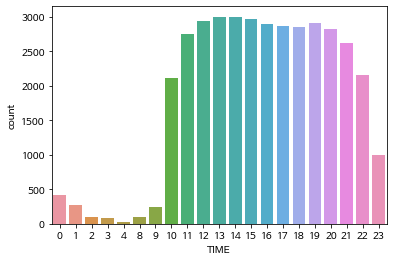

In [76]:
import seaborn as sns
sns.countplot(x='TIME', data = avg)
plt.show()

In [77]:
# 배달량이 적은 0~9까지의 시간대를 삭제
idx = avg[avg['TIME']<=9].index
avg.drop(idx,inplace=True)
avg.head()

,TIME,SIGUNGU,ORDER
469,10,강서구,19100
470,10,관악구,23100
471,10,구로구,22333
472,10,금천구,14300
473,10,동작구,18800


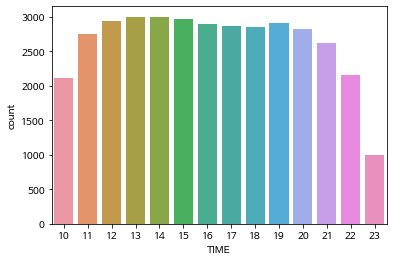

In [78]:
import seaborn as sns
sns.countplot(x='TIME', data = avg)
plt.show()

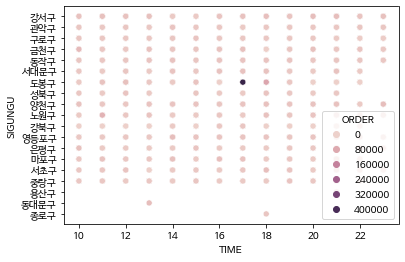

In [79]:
sns.scatterplot(y = 'SIGUNGU',x='TIME',hue = 'ORDER',data = avg)
plt.show()

In [80]:
q3 = avg.quantile(0.7) 
q1 = avg.quantile(0.3)
iqr = q3 - q1

In [81]:
def is_order_outlier(avg):
    ORDER_S = avg['ORDER']
    if ORDER_S > q3['ORDER'] + 1.5 * iqr['ORDER'] or ORDER_S < q1['ORDER'] - 1.5 * iqr['ORDER']:
        return True
    else:
        return False

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
avg['ORDER_O'] = avg.apply(is_order_outlier, axis = 1) # axis = 1 지정 필수

avg

,TIME,SIGUNGU,ORDER,ORDER_O
469,10,강서구,19100,False
470,10,관악구,23100,False
471,10,구로구,22333,False
472,10,금천구,14300,False
473,10,동작구,18800,False
...,...,...,...,...
2015275,23,구로구,11270,True
2015276,23,금천구,18500,False
2015277,23,동작구,21020,False
2015278,23,양천구,37960,True


In [82]:
avg_trim = avg.loc[avg['ORDER_O'] == False]

# 이상치여부를 나타내는 열 제거
del avg_trim['ORDER_O']
avg_trim

,TIME,SIGUNGU,ORDER
469,10,강서구,19100
470,10,관악구,23100
471,10,구로구,22333
472,10,금천구,14300
473,10,동작구,18800
...,...,...,...
2014948,22,영등포구,20050
2015274,23,관악구,22996
2015276,23,금천구,18500
2015277,23,동작구,21020


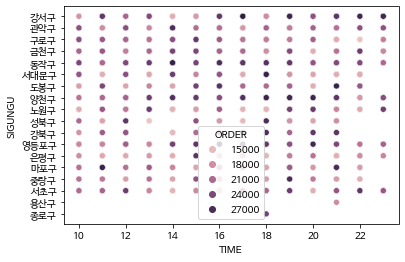

In [83]:
sns.scatterplot(y = 'SIGUNGU',x='TIME',hue = 'ORDER',data = avg_trim)
plt.show()

시군구의 시간별 주문량 기술:
- 강서구 ) 오전보다 16시 이후 오후에 주문량이 많다
- 관악구 ) 오후시간대보다 14-16시 사이의 점심시간 대에 주문량이 많다
- 구로구 ) 오후 시간보다 10-14시 사이의 오전 시간대에 주문량이 많다
- 금천구 ) 주문량이 골고루 분포해 있다
- 동작구 ) 전체적으로 주문량이 많은 편이다
- 서대문구 ) 오전 10시, 12시, 18시 등 식사시간에 주문이 몰리는 편이다
- 도봉구) 15-16시 사이에 주문량이 가장 많으며, 21시에도 주문이 많다
- 양천구 ) 13시부터 21시까지 꾸준히 주문량이 많다
- 노원구 ) 17-20시 사이에 주문량이 집중된다.
- 성북구) 12시, 18시등 식사시간에 주문량이 집중된다.
- 강북구 ) 18시 이후 저녁시간에 주문량이 많아진다
- 영등포구 ) 14-20시까지 점심 이후 시간대에 주문량이 많다
- 은평구 ) 주문량이 대체로 적으며 15시대에 주문량이 많다
- 마포구 ) 11시, 21시 등 식사시간대를 벗어난 시간대의 주문량이 많다
- 중랑구 ) 대체로 주문량이 적은 편이며 그 중 19시의 주문량이 많은편이다
- 서초구 ) 12시, 18시, 21시 이후에 주문량이 많은 편이다.
- 용산구와 종로구는 데이터가 부족하여 정확한 인사이트의 도출이 어렵다. 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


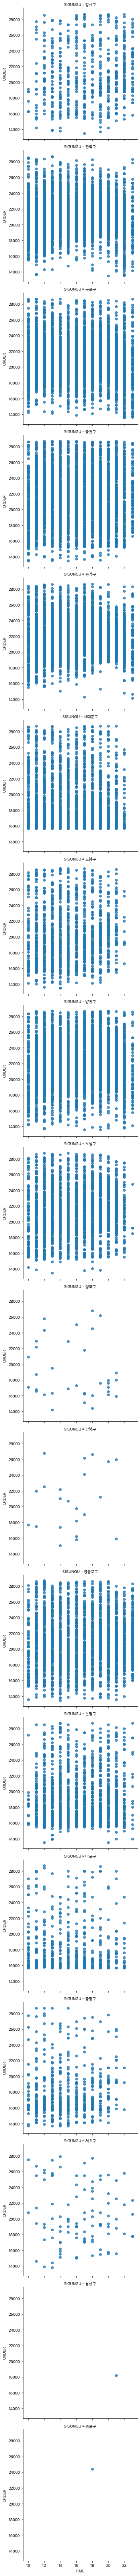

In [84]:
## 더 구체적인 데이터의 분포를 살펴보기 위해 각 시군구별 산점도를 그래프로 표현

grid= sns.FacetGrid(data=avg_trim, row ="SIGUNGU",size=5)
grid.map(sns.regplot,"TIME","ORDER",fit_reg=False)

# 배달 주문에 미치는 영향요소 분석 (1)


*   여성인구비율, 요일, 시간대, 날씨 등 다양한 요인이 배달량에 미치는 영향을 분류 모델을 이용하여 살펴본다.


> 데이터 전처리:


*   업종 목적지별 배달 주문건수 데이터를 바탕으로, 앞서 살펴본 날씨, 성별, 요일, 시간 등의 요소를 독립변수로 설정함.
* 성비 = 남자인구/여자인구*100(2021년기준)
*   종속변수인 배달량은 디저트 업종의 배달 주문건수 데이터 중 값이 0건인 경우를 삭제한 후, 중간값인 3건을 기준으로 3건 미만인 경우 적음(0), 3건 이상의 경우 많음(1)으로 분류함.





In [85]:
classification_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/classification_data.csv", encoding="cp949")

print(classification_data.columns)
display(classification_data.info())
display(classification_data.head()) 

Index(['지역', '성비', '날짜', '요일(숫자)', '요일(문자)', '시간', '강수량값', '기온값', '기온값(범주화)',
       '주문건수', '주문건수(범주화)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         15620 non-null  object 
 1   성비         15620 non-null  float64
 2   날짜         15620 non-null  object 
 3   요일(숫자)     15620 non-null  int64  
 4   요일(문자)     15620 non-null  object 
 5   시간         15620 non-null  int64  
 6   강수량값       15620 non-null  float64
 7   기온값        15620 non-null  float64
 8   기온값(범주화)   15620 non-null  int64  
 9   주문건수       15620 non-null  int64  
 10  주문건수(범주화)  15620 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


None

,지역,성비,날짜,요일(숫자),요일(문자),시간,강수량값,기온값,기온값(범주화),주문건수,주문건수(범주화)
0,강북구,93.12,2020-01-01,3,수,14,0.0,-0.2,2,1,0
1,강북구,93.12,2020-01-01,3,수,16,0.0,-0.2,2,1,0
2,강북구,93.12,2020-01-01,3,수,17,0.0,0.0,3,2,0
3,강북구,93.12,2020-01-01,3,수,18,0.0,0.0,3,2,0
4,강북구,93.12,2020-01-01,3,수,21,0.0,0.1,3,1,0


## 의사결정나무

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = classification_data.iloc[:, [1,3,5,6,8]] 
y = classification_data["주문건수(범주화)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.709
시험용 데이터 정확도: 0.717


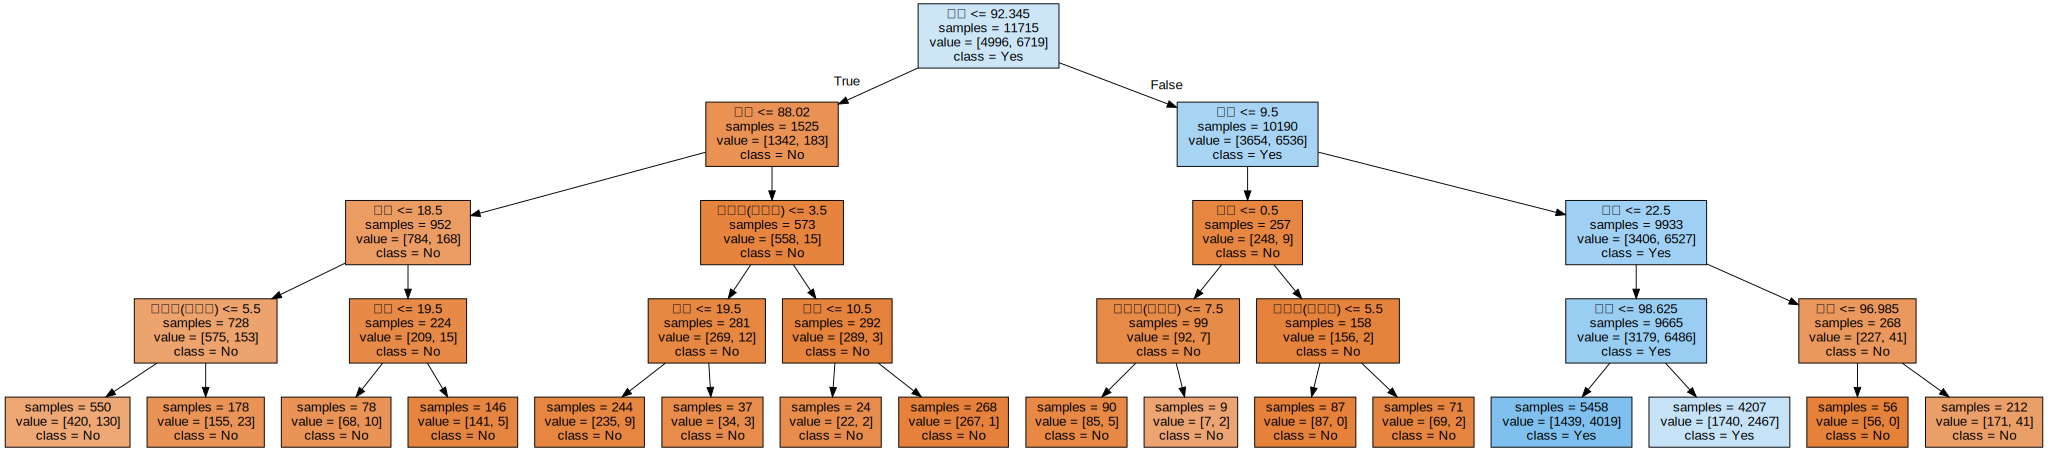

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],
                feature_names=classification_data.columns[[1,3,5,6,8]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

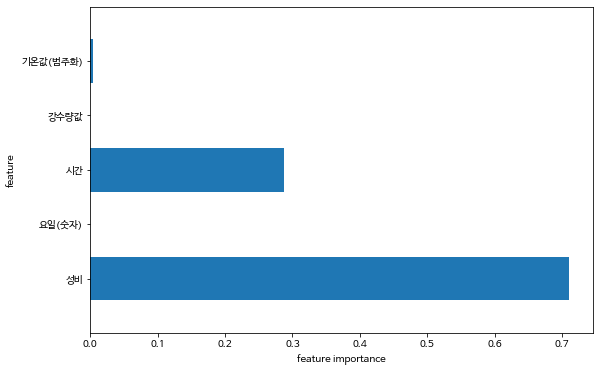

In [88]:
## 변수 중요도 파악
import numpy as np

def plot_feature_importances_classification_data(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(classification_data.columns[[1,3,5,6,8]]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), classification_data.columns[[1,3,5,6,8]])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_classification_data(tree)

## 랜덤포레스트

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.898
시험용 데이터 세트 정확도: 0.802


## 그래디언트 부스팅

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.835
시험용 데이터 세트 정확도: 0.841


In [91]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [92]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.720529,10,0.721127,0.723175,0.717286
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.823645,3,0.813060,0.829962,0.827913
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.831583,1,0.824072,0.836364,0.834315
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.715834,11,0.713700,0.716517,0.717286
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.811353,5,0.817414,0.814597,0.802049
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.827998,2,0.821511,0.832778,0.829706
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.713017,13,0.708323,0.716517,0.714213
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.801451,7,0.801280,0.802305,0.800768
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.821767,4,0.811780,0.826633,0.826889
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.708749,14,0.705762,0.708579,0.711908


In [93]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.8316


In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=3)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.835
시험용 데이터 세트 정확도: 0.841


## 분류 모델 평가 및 선정
* 그래디언트 부스팅의 정확도가 가장 높았음.
* ROC 곡선 확인 결과 그래디언트 부스팅이 더 좋은 성능을 보여줌.

In [95]:
## 교차 검증

from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.70477816 0.70392491 0.71501706 0.70051195 0.71928328 0.70623399
 0.70794193 0.72587532 0.71562767 0.69342442]
Random forest:  [0.78242321 0.80716724 0.79778157 0.81313993 0.80204778 0.81212639
 0.80700256 0.81383433 0.7822374  0.79248506]
Gradient boosting:  [0.81911263 0.83020478 0.83276451 0.83191126 0.82423208 0.84372331
 0.83347566 0.84372331 0.83347566 0.82835184]
Accuracy mean
Decision tree :0.709
Random forest :0.801
Gradient boosting :0.832


[[0.26364969 0.73635031]
 [0.26364969 0.73635031]
 [0.26364969 0.73635031]
 ...
 [0.26364969 0.73635031]
 [0.26364969 0.73635031]
 [0.41359639 0.58640361]]


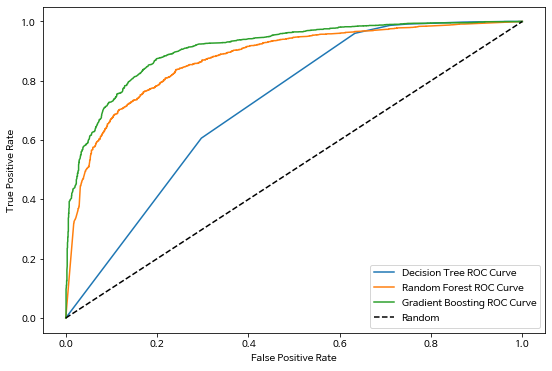

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, gbrt.predict_proba(X_test)[:, 1])

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random") ## 비교를 위한 대각선

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

# 배달 주문에 미치는 영향요소 분석 (2)
* 독립변수의 범위를 좁혀, 업종 목적지별 배달 주문건수 데이터 등에 분류 모델을 활용하여 날씨별 카페/디저트 배달량을 살펴본다.

In [97]:
weather = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/weather2_preprocessed.csv")

print(weather.columns)
display(weather.info())
display(weather.head())

Index(['광역시도명', '시군구명', '강수량값', '기온값', '습도값', '풍속값', '풍향값', '강수유무', '배달유무',
       '배달건수(파생변수)', '시간대(파생변수)', '시간대별시간', '카페-디저트 배달건수', '강수유형명'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32013 entries, 0 to 32012
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   광역시도명        32013 non-null  object 
 1   시군구명         32013 non-null  object 
 2   강수량값         32013 non-null  float64
 3   기온값          32013 non-null  float64
 4   습도값          32013 non-null  int64  
 5   풍속값          32013 non-null  float64
 6   풍향값          32013 non-null  int64  
 7   강수유무         32013 non-null  int64  
 8   배달유무         32013 non-null  int64  
 9   배달건수(파생변수)   32013 non-null  object 
 10  시간대(파생변수)    32013 non-null  object 
 11  시간대별시간       32013 non-null  int64  
 12  카페-디저트 배달건수  32013 non-null  int64  
 13  강수유형명        32013 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage

None

,광역시도명,시군구명,강수량값,기온값,습도값,풍속값,풍향값,강수유무,배달유무,배달건수(파생변수),시간대(파생변수),시간대별시간,카페-디저트 배달건수,강수유형명
0,서울특별시,강남구,0.0,2.9,68,0.3,258,0,0,No,AM,11,0,없음
1,서울특별시,강남구,0.0,2.8,69,1.2,264,0,0,No,PM,12,0,없음
2,서울특별시,강남구,0.0,2.6,71,1.4,254,0,0,No,PM,13,0,없음
3,서울특별시,강남구,0.0,3.0,45,1.8,272,0,0,No,AM,10,0,없음
4,서울특별시,강남구,0.0,0.6,68,0.0,0,0,0,No,PM,15,0,없음


### 의사결정나무

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = weather.iloc[:, [2,3,7]] 
y = weather["배달유무"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.548
시험용 데이터 정확도: 0.544


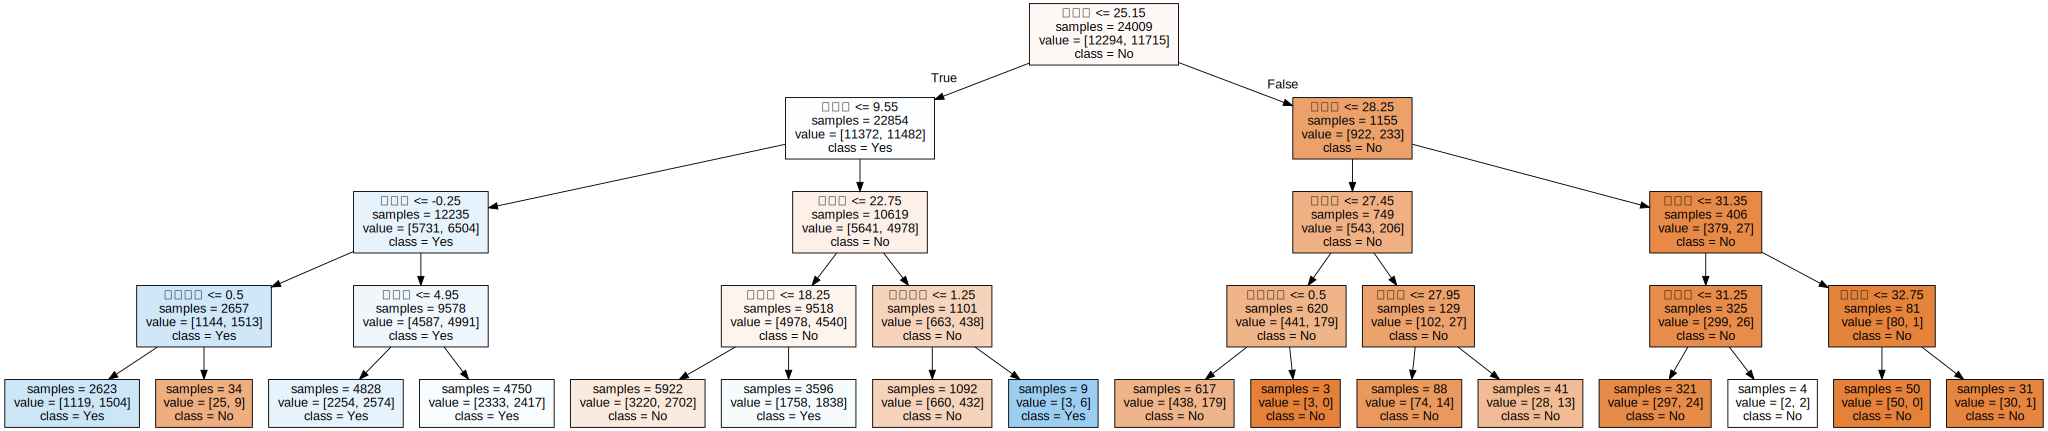

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],
                feature_names=weather.columns[[2,3,7]], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

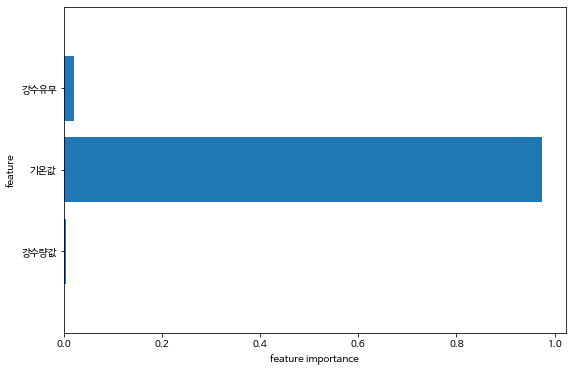

In [100]:
# 변수 중요도 파악
import numpy as np

def plot_feature_importances_weather(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(weather.columns[[2,3,7]]) 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), weather.columns[[2,3,7]])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_weather(tree)

### 랜덤포레스트

In [101]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.589
시험용 데이터 세트 정확도: 0.543


### 그래디언트부스팅


In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.559
시험용 데이터 세트 정확도: 0.552


In [103]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [104]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.540631,10,0.533925,0.551543,0.536424
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.543671,5,0.537673,0.551918,0.541422
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.545920,1,0.538423,0.553542,0.545795
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.540422,12,0.534050,0.551543,0.535674
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.543588,6,0.537798,0.551668,0.541297
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.545629,2,0.536174,0.554667,0.546045
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.540464,11,0.534300,0.551543,0.535549
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.543463,7,0.537548,0.552043,0.540797
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.544629,4,0.536674,0.556541,0.540672
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.540089,13,0.534175,0.550544,0.535549


In [105]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.5459


In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=3)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.559
시험용 데이터 세트 정확도: 0.552


### 분류 모델 평가 및 선정


*   정확도에 있어서는 그래디언트 부스팅이 가장 높은 정확도를 보이지만 근소한 차이임.
*   ROC 곡선 확인 결과도 비슷하나, 그래디언트 부스팅이 근소하게 우수함.

In [107]:
## 교차 검증

from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.54019159 0.5272803  0.52686381 0.56851312 0.55102041 0.52186589
 0.54852145 0.54435652 0.55476885 0.55208333]
Random forest:  [0.51270304 0.52852978 0.54019159 0.53436068 0.55393586 0.5331112
 0.54977093 0.51686797 0.53561016 0.54458333]
Gradient boosting:  [0.54060808 0.54019159 0.54102457 0.5639317  0.5635152  0.54102457
 0.55518534 0.53685964 0.55351937 0.54666667]
Accuracy mean
Decision tree :0.544
Random forest :0.535
Gradient boosting :0.548


[[0.54373522 0.45626478]
 [0.49115789 0.50884211]
 [0.6043956  0.3956044 ]
 ...
 [0.42661075 0.57338925]
 [0.49115789 0.50884211]
 [0.6043956  0.3956044 ]]


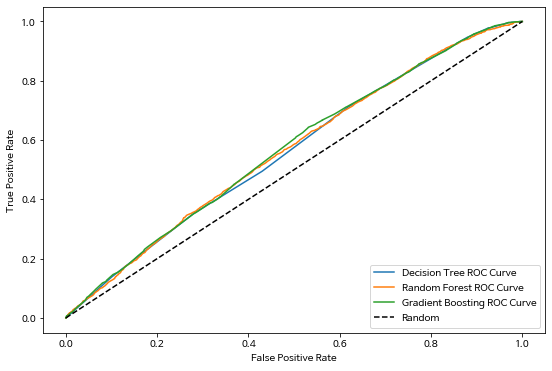

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, gbrt.predict_proba(X_test)[:, 1])

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random") ## 비교를 위한 대각선

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 